<a href="https://colab.research.google.com/github/MatheusrCunha/processamento_imagem/blob/main/TransformadaDiscretadoCosseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [ ]:
x = np.array([2, 3, 1, 7])
dct_result = scipy.fft.dct(x)
print("DCT: ", ["{:.2f}".format(i) for i in dct_result])

DCT:  ['26.00', '-7.71', '7.07', '-7.52']


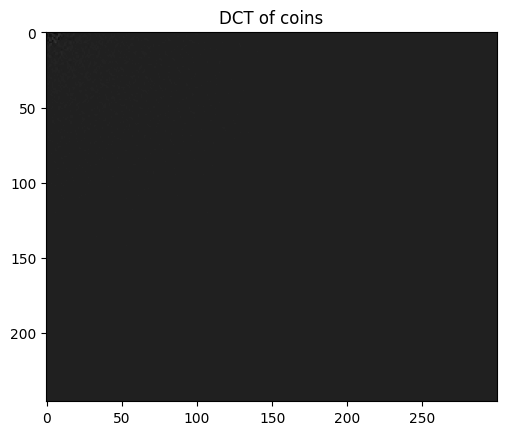

In [ ]:
im = skimage.io.imread(
     'https://www.mathworks.com/help/examples/symbolic/win64/BinomialCoefficientExample_01.png',as_gray=True)

def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct(scipy.fftpack.idct(a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

plt.imshow(dct2(im), cmap='gray')
plt.title('DCT of coins')
plt.savefig('dct_coins.jpg')
plt.show()


Keeping only 8.45% of the DCT coefficients


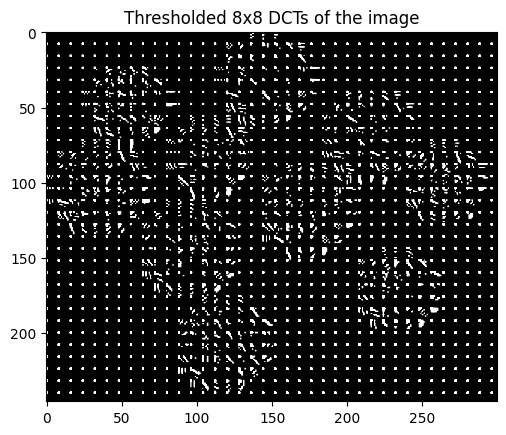

In [ ]:
imsize = im.shape
dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

thresh = 0.01
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))
percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only {:.2f}% of the DCT coefficients".format(percent_nonzeros*100.0))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")
plt.savefig('dct_thresh.jpg')
plt.show()

Keeping only 1.62% of the DCT coefficients


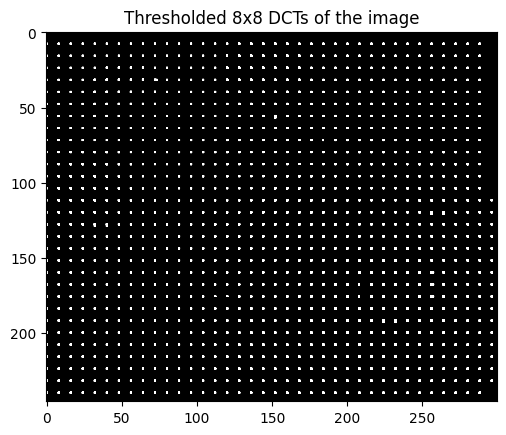

In [ ]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

# Threshold
thresh = 0.2
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))
percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only {:.2f}% of the DCT coefficients".format(percent_nonzeros*100.0))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")
plt.savefig('dct_thresh2.jpg')
plt.show()